In [2]:
using BenchmarkTools, LinearAlgebra, Plots, Base.Threads
include("../aux_functions/aux_functions.jl")


get_energy_rel (generic function with 1 method)

In [ ]:



const N = 200_000::Int64
const J = (100::Int64,200::Int64)
const Box_x = (0.0::Float64,1.0::Float64,0.0::Float64,1.0::Float64)
order = 5
const corder = Val(order)


@show nthreads()

dx = differentials(Box_x,J)


# for plotting and other things
x_p = [dx[1]*(i-1) for i in 1:J[1]] ;
y_p = [dx[2]*(i-1) for i in 1:J[2]] ;

par_grid = (N, J, Box_x, order)

S = [0.0::Float64 for l in 1:2, i in 1:J[1], j in 1:J[2]]
#S_new  = [0.0::Float64 for i in 1:J[1], j in 1:J[2], l in 1:2]
TS = zeros(Float64,(2,J...,nthreads()))

par_current_threads_S = (par_grid, TS)



u_r = Float64[]
for i in 1:N
    u1 = Box_x[2] * rand()
    u2 = Box_x[4] * rand()
    u3 = (1.0 - 2.0 * rand())
    u4 = (1.0 - 2.0 * rand())
    append!(u_r, [u1, u2, u3, u4])
    #@show u_r
end

par_dis = deepcopy(u_r)

get_current_threads_2D!(par_dis, S, par_current_threads_S)
#S_new = get_current_2D_trans(corder, N, J, Box_x, par_dis)

@show sum(S[1,:,:])
#@show sum(S_new[:,:,1])

#@btime get_current_2D_trans(corder, $N, $J, $Box, $u)

In [11]:
@show norm(S[1,:,:] - S_new[:,:,1])/norm(S[1,:,:])

norm(S[1, :, :] - S_new[:, :, 1]) / norm(S[1, :, :]) = 2.2973592795844805e-16


2.2973592795844805e-16

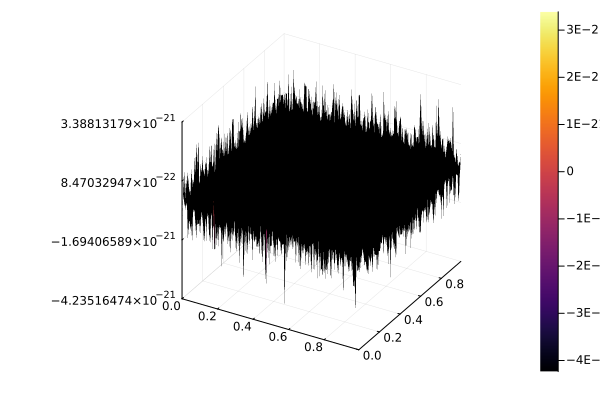

In [12]:
surface(y_p,x_p, S[1,:,:] - S_new[:,:,1])

In [5]:
my_current = Current2DTrans(N, J)

Current2DTrans(200000, (100, 200), [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [1 1; 1 1; … ; 1 1; 1 1], [0.0 0.0; 0.0 0.0; … ; 0.0 0.0; 0.0 0.0], [0.0 0.0; 0.0 0.0; … ; 0.0 0.0; 0.0 0.0])

In [6]:
my_S = my_current(corder, Box_x, par_dis);

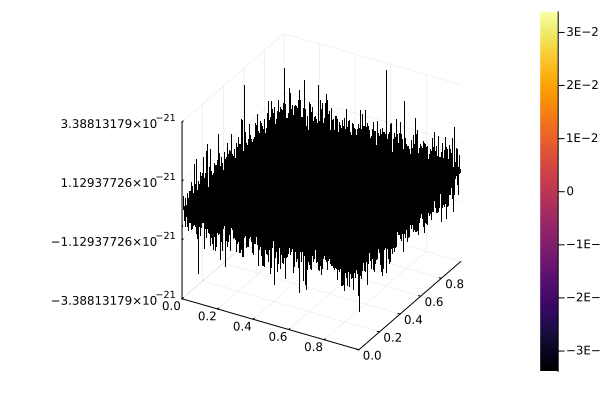

In [7]:
surface(y_p,x_p, my_S[:,:,1] - S[1,:,:])


## Density check

In [23]:
const N = 200_000::Int64
const J = (100::Int64,200::Int64)
const Box_x = (0.0::Float64,1.0::Float64,0.0::Float64,1.0::Float64)
order = 5
const corder = Val(order)
include("../aux_functions/aux_functions.jl")

@show nthreads()

dx = differentials(Box_x,J)


# for plotting and other things
x_p = [dx[1]*(i-1) for i in 1:J[1]] ;
y_p = [dx[2]*(i-1) for i in 1:J[2]] ;

par_grid = (N, Box_x, J, order)






u_r = Float64[]
for i in 1:N
    u1 = Box_x[2] * rand()
    u2 = Box_x[4] * rand()
    u3 = (1.0 - 2.0 * rand())
    u4 = (1.0 - 2.0 * rand())
    append!(u_r, [u1, u2, u3, u4])
    #@show u_r
end

par_dis = deepcopy(u_r)

n = zeros(J)

get_density_2D!(par_dis, n, par_grid)

get_density_2D_trans = Density2DTrans(N, J)
n_new = get_density_2D_trans(Val(order), Box_x, par_dis)

nthreads() = 2


100×200 Matrix{Float64}:
 1.16657   1.18386   0.94935   0.88765   …  0.807059  1.00276   1.17744
 1.33514   1.37422   1.12535   0.869396     0.827338  0.828184  1.11692
 1.29613   1.36799   1.12255   0.927353     0.789192  0.783177  1.07392
 1.11022   1.0812    1.03771   1.05623      0.875359  0.907579  1.11219
 1.01003   0.834051  0.8568    1.087        1.09038   1.21804   1.18052
 1.22861   0.988854  0.818283  0.998896  …  1.01478   1.1968    1.29242
 1.09835   1.05146   0.977635  0.952486     0.974698  1.04068   1.15346
 0.878645  0.779997  0.787481  0.942055     0.898857  1.07415   1.09361
 0.971987  0.76444   0.680185  0.869541     0.917876  1.10215   1.07558
 1.2808    1.05165   0.923705  0.87281      1.04619   1.07209   1.13786
 ⋮                                       ⋱                      
 1.21093   1.08892   0.897903  0.796293     1.23825   1.13525   1.09882
 1.36554   1.11008   0.912894  0.796781     1.10861   1.06143   1.17274
 1.17272   0.937079  0.908617  0.959118     1.

In [11]:
norm(n-n_new)/norm(n)

4.478166893995325e-16

In [12]:
sum(n_new)/prod(J)

1.0

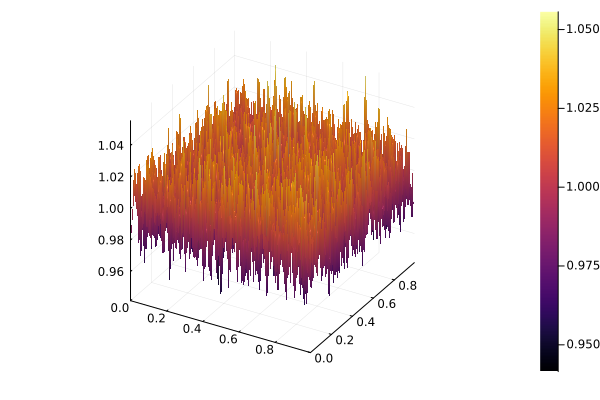

In [19]:
surface(y_p,x_p, n[:,:])

In [24]:
@show mean(n)
@show var(n)

mean(n) = 1.0
var(n) = 0.01880257343257141


0.01880257343257141

```
N = 20_000_000
mean(n) = 0.9999999999999998
var(n) = 0.00018414938295667444
N = 200_000
mean(n) = 1.0
var(n) = 0.01880257343257141
```
Va como $1/N$, pensé que iría como $1/\sqrt{N}$.

In [16]:
const J = (10::Int64,20::Int64)
const N = prod(J)
const Box_x = (0.0::Float64,1.0::Float64,0.0::Float64,1.0::Float64)
order = 5
const corder = Val(order)
include("../aux_functions/aux_functions.jl")

@show nthreads()

dx = differentials(Box_x,J)


# for plotting and other things
x_p = [dx[1]*(i-1) for i in 1:J[1]] ;
y_p = [dx[2]*(i-1) for i in 1:J[2]] ;

par_grid = (N, Box_x, J, order)




p = [0.9,0.1]

u_r = Float64[]
for i in 1:J[1]
    for j in 1:J[2]
        u1 = dx[1]*(i-1) + dx[1]/2.0*(1.2)
        u2 = dx[2]*(j-1) + dx[2]/2.0*(1.3)
        u3 = p[1]
        u4 = p[2]
        append!(u_r, [u1, u2, u3, u4])
    end
end

par_dis = deepcopy(u_r)

n = zeros(J)

get_density_2D!(par_dis, n, par_grid)

get_density_2D_trans = Density2DTrans(N, J)
n_new = get_density_2D_trans(Val(order), Box_x, par_dis)

nthreads() = 2


10×20 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0

## Check Current density

In [15]:
S = [0.0::Float64 for l in 1:2, i in 1:J[1], j in 1:J[2]]
TS = zeros(Float64,(2,J...,nthreads()))
par_current_threads_S = (par_grid, TS)

my_current = Current2DTrans(N, J)

my_S = my_current(corder, Box_x, par_dis);

my_S[:,:,2]


10×20 Matrix{Float64}:
 0.0741249  0.0741249  0.0741249  …  0.0741249  0.0741249  0.0741249
 0.0741249  0.0741249  0.0741249     0.0741249  0.0741249  0.0741249
 0.0741249  0.0741249  0.0741249     0.0741249  0.0741249  0.0741249
 0.0741249  0.0741249  0.0741249     0.0741249  0.0741249  0.0741249
 0.0741249  0.0741249  0.0741249     0.0741249  0.0741249  0.0741249
 0.0741249  0.0741249  0.0741249  …  0.0741249  0.0741249  0.0741249
 0.0741249  0.0741249  0.0741249     0.0741249  0.0741249  0.0741249
 0.0741249  0.0741249  0.0741249     0.0741249  0.0741249  0.0741249
 0.0741249  0.0741249  0.0741249     0.0741249  0.0741249  0.0741249
 0.0741249  0.0741249  0.0741249     0.0741249  0.0741249  0.0741249

In [17]:
p2v(p)

2-element Vector{Float64}:
 0.667124384994991
 0.07412493166611012

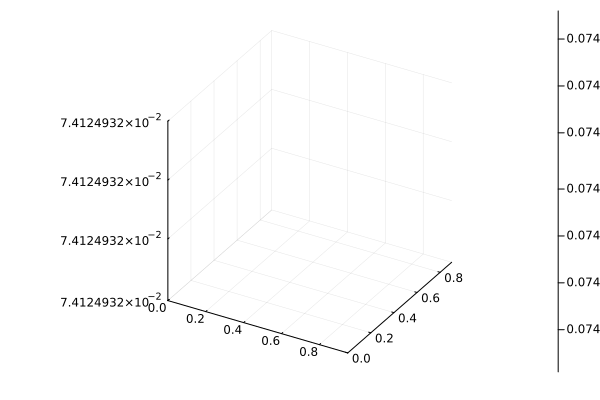

GKS: Rectangle definition is invalid in routine CELLARRAY
GKS: Rectangle definition is invalid in routine CELLARRAY
GKS: Rectangle definition is invalid in routine CELLARRAY


In [13]:
surface(y_p,x_p, my_S[:,:,2])